In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import Output

from statsmodels.tsa.arima_model import ARIMA

import random


In [46]:
storage_length = 10

storage = [random.randrange(0, 3, 1) for i in range(storage_length)]
print(storage)
storage = storage[1:]
print(storage)
storage.append(2)
print(storage)

[2, 0, 1, 0, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 2]


In [47]:
# r = 0
# p = 1
# s = 2

In [48]:
# Returns -1 if p1 wins and 1 if p1 wins
def calculate_winner(p1, p2):
    if p1 == p2: return 0
    if p2 - p1 == 1 or p2 - p1 == -2: return 1
    return -1

In [49]:
def prediction_model(s, storage = None):
    
#     random replies
    if s == 'r':
        return random.randrange(0, 3, 1)
    

In [50]:
def map_char_to_int(c):
    if c == 'r': return 0
    if c == 'p': return 1
    if c == 's': return 2

In [51]:
def update_storage(storage, player_choice):
    storage = storage[1:]
    storage.append(player_choice)
    return storage

In [52]:
#plt.plot(np.arange(storage_length), storage, '-')

def plot_current(storage, prediction=None):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, storage_length, 5)
    minor_ticks = np.arange(0, storage_length, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    plt.plot(np.arange(storage_length), storage, 'c-')
    plt.plot(np.arange(storage_length), storage, 'ko')
    
    if(prediction): plt.plot(storage_length+1, prediction, 'ro')

    plt.show()

r


Output()

Player: 0 Computer: 1 wins: 0 losses: 1
Press Enter to continue...p

final storage: 


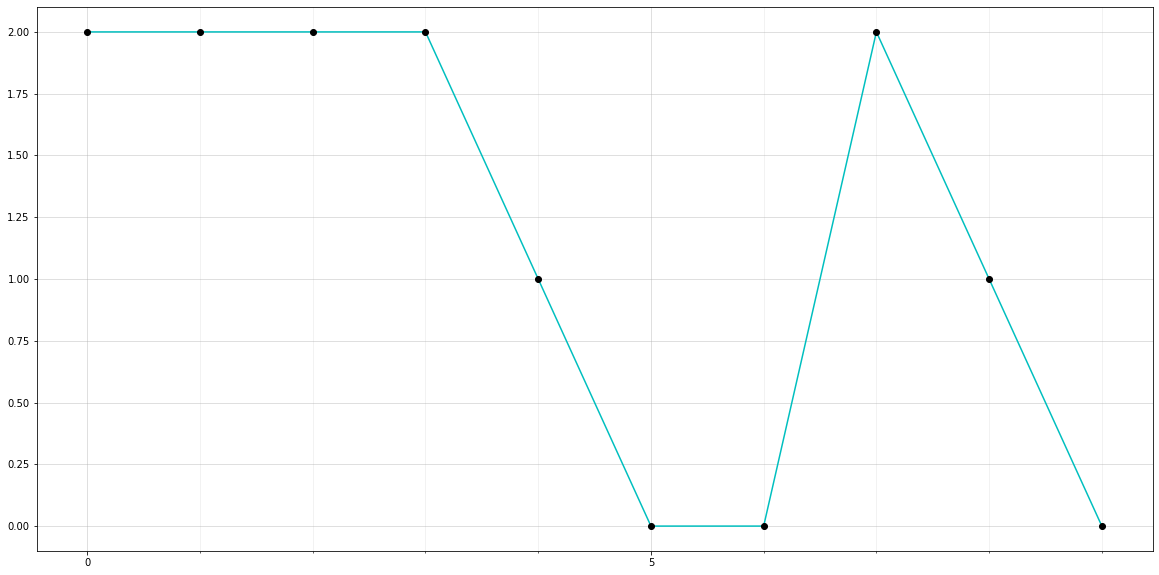

In [53]:
player_wins = 0
computer_wins = 0

storage = [random.randrange(0, 3, 1) for i in range(storage_length)]

while True: 
    
    player_choice = input()
    if player_choice not in ['r', 'p', 's']: break
    computer_choice = prediction_model('r', storage=storage)
        
    player_choice = map_char_to_int(player_choice)
    winner = calculate_winner(player_choice, computer_choice)
    
    if winner == 1: computer_wins += 1
    if winner == -1: player_wins += 1
        
    storage = update_storage(storage, player_choice)
    #print(storage)
        
    out = Output()
    display(out)
    
    
    print('Player: {} Computer: {} wins: {} losses: {}'
          .format(player_choice, computer_choice, player_wins, computer_wins))

    with out:
    
        plot_current(storage)

    input("Press Enter to continue...")
    out.clear_output()

    
print('final storage: ')
plot_current(storage)

In [56]:
model = ARIMA(storage, order=(5,2,0))
model_fit = model.fit(disp=0)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [20]:
prediction = model_fit.forecast()[0]

In [27]:
print(prediction)

[1.50093215]


In [15]:
storage = [0,1,2,0,1,2,0,1,2]
storage_length = len(storage)

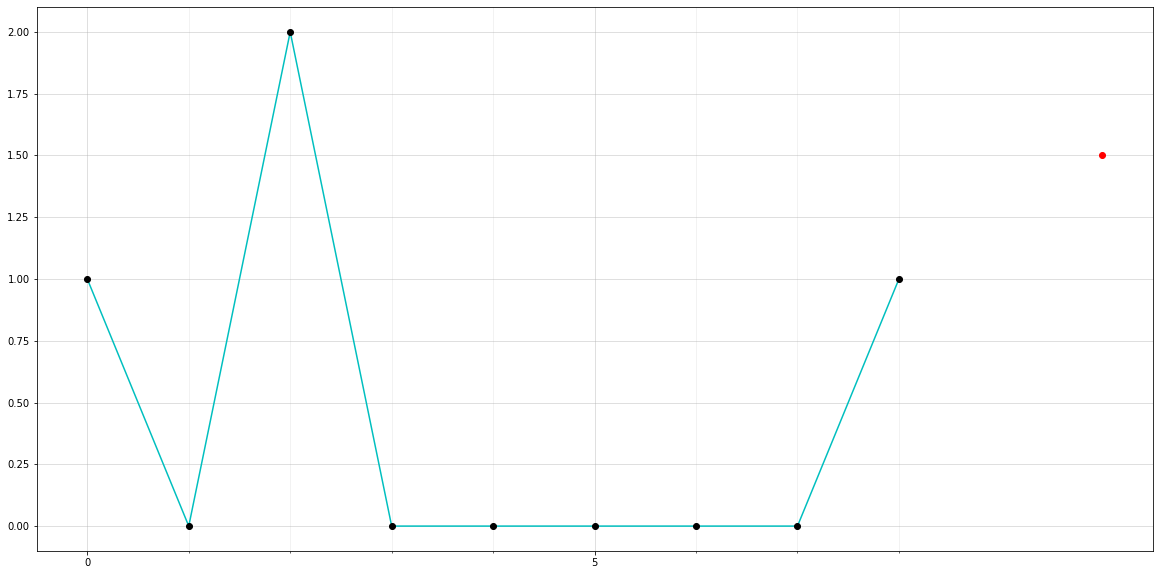

In [41]:
plot_current(storage, prediction)